# Brazilian Congress proposals analysis

## About me
<table cellspacing="0" cellpadding="0">
  <tr>
    <td>
        Diego Alves <br />
        Software Engineer<br />
        <link rel="stylesheet" href="//maxcdn.bootstrapcdn.com/font-awesome/4.3.0/css/font-awesome.min.css">
        <i class="fa fa-google"></i> &nbsp; <a href="mailto:diegocardalves@gmail.com">Email</a><br />
        <i class="fa fa-linkedin"></i> &nbsp; <a href="https://www.linkedin.com/in/diegocardosoalves">LinkedIn</a><br />
        <i class="fa fa-github fa-lg"></i> &nbsp; <a href="https://github.com/diegoca80/datascience">Github</a><br />
    </td>
    <td>
        <a href="https://www.linkedin.com/in/diegocardosoalves" target="_blank"><img src="http://i67.tinypic.com/1jn605.png" border="0" alt="Diego Alves"></a>
    </td>
  </tr>
</table>

### Imports and configurations

In [1]:
import pandas as pd
%matplotlib inline
pd.set_option("max_rows", 10)
pd.set_option("max_columns", 100)
from seaborn import set_style
set_style("darkgrid")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Exploring data

In [2]:
data = pd.read_csv("allProp.csv", na_values=["\n"])
data.head()

c:\users\diegocardoso\appdata\local\programs\python\python35-32\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,V1,.id,id,nome,tipoProposicao.id,tipoProposicao.sigla,tipoProposicao.nome,numero,ano,orgaoNumerador.id,orgaoNumerador.sigla,orgaoNumerador.nome,datApresentacao,txtEmenta,txtExplicacaoEmenta,regime.codRegime,regime.txtRegime,apreciacao.id,apreciacao.txtApreciacao,autor1.txtNomeAutor,autor1.idecadastro,autor1.codPartido,autor1.txtSiglaPartido,autor1.txtSiglaUF,qtdAutores,ultimoDespacho.datDespacho,ultimoDespacho.txtDespacho,situacao.id,situacao.descricao,situacao.orgao.codOrgaoEstado,situacao.orgao.siglaOrgaoEstado,situacao.principal.codProposicaoPrincipal,situacao.principal.proposicaoPrincipal,indGenero,qtdOrgaosComEstado
0,1,proposicao,2116568,PL 6450/2016,139,PL,Projeto de Lei,6450,2016,180,PLEN,PLENÁRIO,9/11/2016 13:07:00,Altera o inciso I do § 2.º do art. 47 da Lei n...,\n,99,.,99,.,Betinho Gomes,178915,128,PSDB,PE,1,\n,\n,905,Aguardando Despacho do Presidente da Câmara do...,100001,SECAP(SGM),0,\n,o,1
1,2,proposicao,2116570,PL 6451/2016,139,PL,Projeto de Lei,6451,2016,180,PLEN,PLENÁRIO,9/11/2016 13:07:00,"Altera o § 1.º-A do art. 23 da Lei n.º 9.504, ...",\n,99,.,99,.,Betinho Gomes,178915,128,PSDB,PE,1,\n,\n,905,Aguardando Despacho do Presidente da Câmara do...,100001,SECAP(SGM),0,\n,o,1
2,3,proposicao,2116534,PL 6449/2016,139,PL,Projeto de Lei,6449,2016,180,PLEN,PLENÁRIO,9/11/2016 12:14:00,Obriga as operadoras que disponibilizam o ace...,\n,99,.,99,.,Marcelo Aguiar,160660,202,DEM,SP,1,\n,\n,905,Aguardando Despacho do Presidente da Câmara do...,100001,SECAP(SGM),0,\n,o,1
3,4,proposicao,2116465,PL 6445/2016,139,PL,Projeto de Lei,6445,2016,180,PLEN,PLENÁRIO,8/11/2016 19:39:00,"Altera a Lei n.º 8.313, de 23 de dezembro de 1...",\n,99,.,99,.,Dagoberto,141411,104,PDT,MS,1,\n,\n,905,Aguardando Despacho do Presidente da Câmara do...,100001,SECAP(SGM),0,\n,o,1
4,5,proposicao,2116464,PL 6447/2016,139,PL,Projeto de Lei,6447,2016,180,PLEN,PLENÁRIO,8/11/2016 19:38:00,"Altera a Lei n.º 2.848, de 1940 - Código Penal...",\n,99,.,99,.,Dagoberto,141411,104,PDT,MS,1,\n,\n,905,Aguardando Despacho do Presidente da Câmara do...,100001,SECAP(SGM),0,\n,o,1


In [3]:
# Checking if we have null values and type columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69856 entries, 0 to 69855
Data columns (total 35 columns):
V1                                           69856 non-null int64
.id                                          69856 non-null object
id                                           69856 non-null int64
nome                                         69856 non-null object
tipoProposicao.id                            69856 non-null int64
tipoProposicao.sigla                         69856 non-null object
tipoProposicao.nome                          69856 non-null object
numero                                       69856 non-null int64
ano                                          69856 non-null int64
orgaoNumerador.id                            69856 non-null object
orgaoNumerador.sigla                         69856 non-null object
orgaoNumerador.nome                          69856 non-null object
datApresentacao                              69856 non-null object
txtEmenta                

In [4]:
data.describe()

,V1,id,tipoProposicao.id,numero,ano,regime.codRegime,apreciacao.id,qtdAutores,situacao.principal.codProposicaoPrincipal,qtdOrgaosComEstado
count,69856.00000,6.985600e+04,69856.000000,69856.000000,69856.000000,69856.000000,69856.000000,69856.000000,6.985600e+04,69856.000000
mean,5270.08174,4.334036e+05,176.038723,2810.654446,2004.755468,20.906551,9.010021,2.317410,8.422757e+04,0.981090
std,3301.15780,5.094869e+05,90.140729,2262.569916,7.355388,17.681644,19.445635,15.138495,2.540048e+05,0.282073
min,1.00000,1.347700e+04,135.000000,1.000000,1990.000000,14.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,2495.00000,1.181835e+05,139.000000,719.000000,2000.000000,14.000000,4.000000,1.000000,0.000000e+00,1.000000
50%,4990.00000,2.979535e+05,139.000000,2361.000000,2005.000000,14.000000,5.000000,1.000000,0.000000e+00,1.000000
75%,7644.25000,5.015752e+05,139.000000,4579.000000,2011.000000,20.000000,5.000000,1.000000,0.000000e+00,1.000000
max,12705.00000,2.116570e+06,634.000000,8334.000000,2016.000000,101.000000,99.000000,268.000000,2.115172e+06,5.000000


#### As we can see above, the mean() for qtdAutores is around 2 which is the mean of authors responsible for proposals.
#### We can also check the top 10 distribution in order to enumerate the main proposal authors.

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

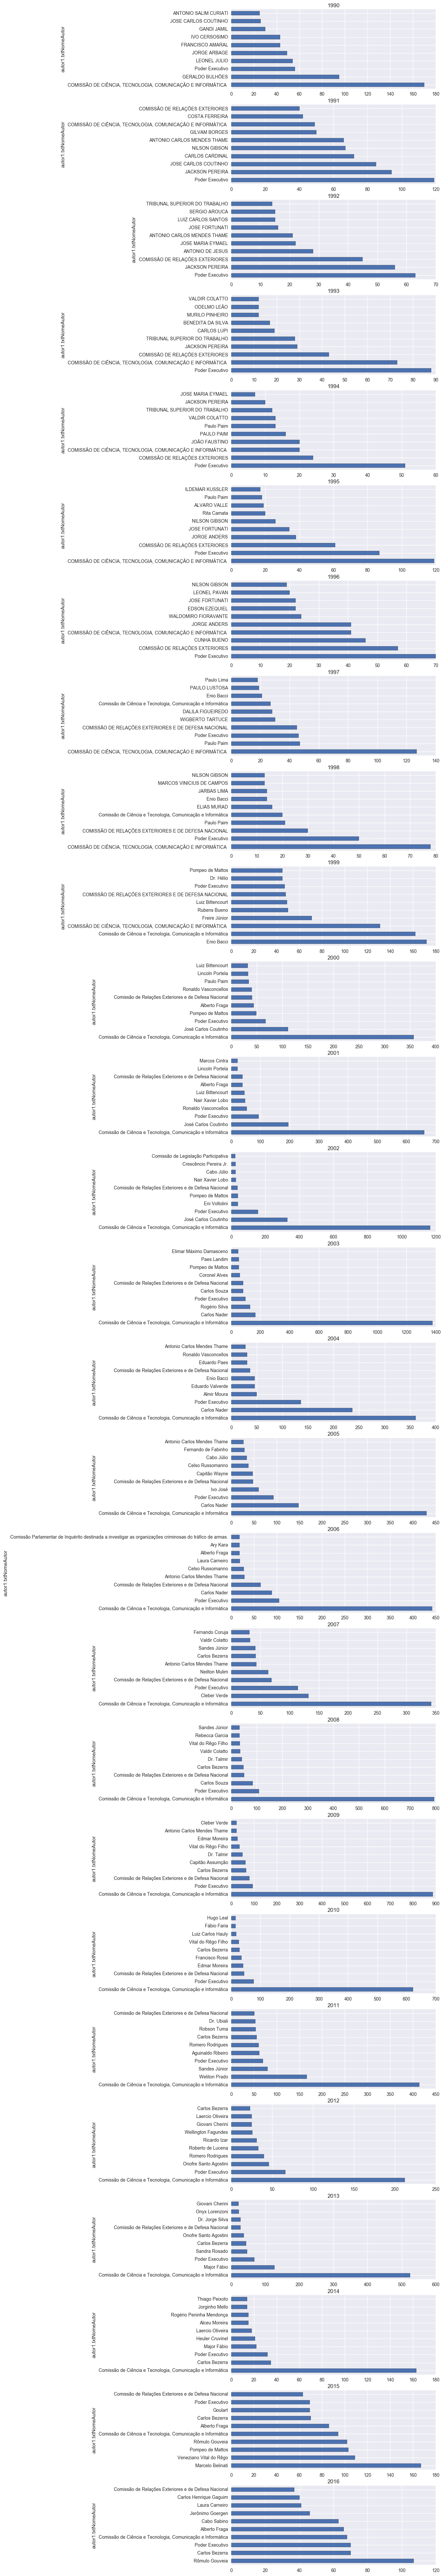

In [6]:
fig, axes = plt.subplots(data['ano'].nunique(),1, figsize=(8,100))
for (year, group), ax in zip(data.groupby("ano"), axes.flatten()):
    group.groupby(["autor1.txtNomeAutor"]).size().nlargest(10).plot(kind="barh",ax=ax,title=year)


### We can see that both "Comissão de Ciência e Tecnologia, Comunicação e Informática", "Comissão de Relações Exteriores e de Defesa Nacional" and "Poder Executivo" are frequently creating new proposals over the years. However, these authors are a group of members in Brazil so we could treat as outliers or only ignore. 

## Let's do the same analysis for political party since Brazilian people usually choose candidates based on their representation.

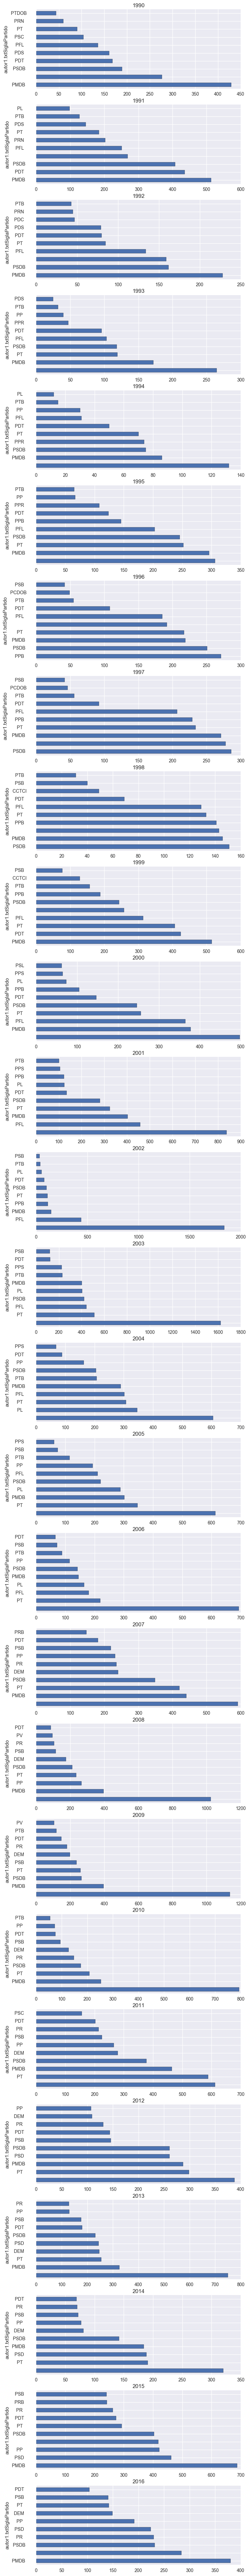

In [7]:
fig, axes = plt.subplots(data['ano'].nunique(),1, figsize=(8,100))
for (year, group), ax in zip(data.groupby("ano"), axes.flatten()):
    group.groupby(["autor1.txtSiglaPartido"]).size().nlargest(10).plot(kind="barh",ax=ax,title=year)

## Let's check the top 5 representation over the years using entire data.
### PS: Blank value is not null. It belongs to the organizations cited previously.

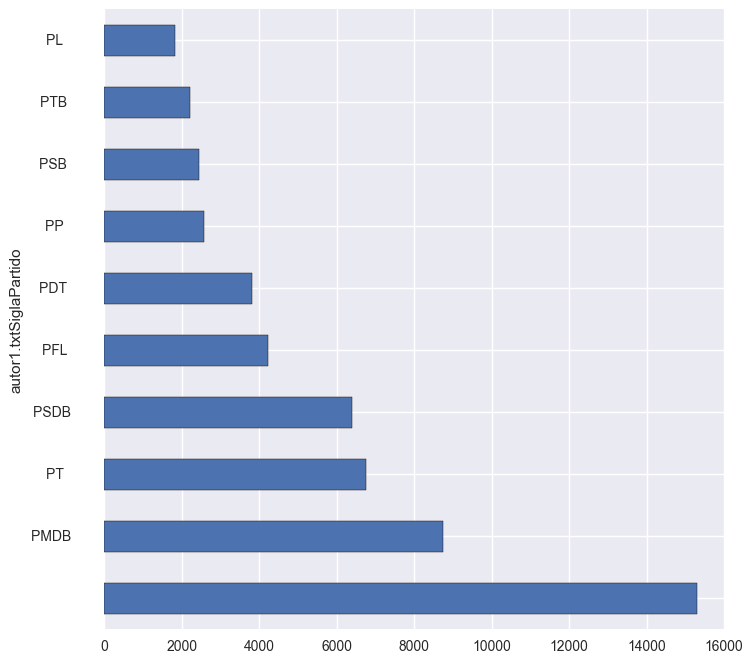

In [8]:
data.groupby("autor1.txtSiglaPartido").size().nlargest(10).plot(kind="barh", figsize=(8,8))

## As we have these information organized by year but a lot of different political parties, let's show a time series of the proposals number by the 3 most representative.

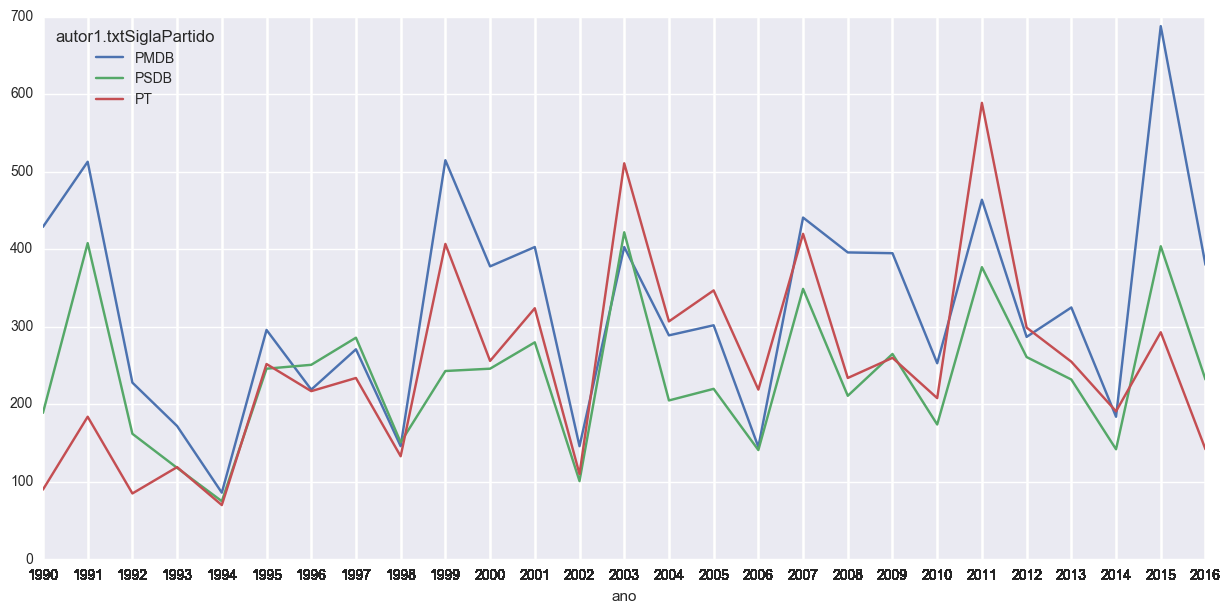

In [9]:
# Creating new column with size of group by 2 features(year,political party)
data['groupby_ano_partido'] = data.groupby(["ano","autor1.txtSiglaPartido"])['ano'].transform('size')
# Removing extra white spaces on strings
data['autor1.txtSiglaPartido'] = data["autor1.txtSiglaPartido"].str.strip()
data = data[(data["autor1.txtSiglaPartido"] == "PT") |
     (data["autor1.txtSiglaPartido"] == "PSDB") |
     (data["autor1.txtSiglaPartido"] == "PMDB")]
data.groupby(["ano","autor1.txtSiglaPartido"]).mean().unstack("autor1.txtSiglaPartido")["groupby_ano_partido"].plot(figsize=(15,7),xticks=data['ano'])

## Simple observations:
- > In fact, we have the majority number of proposals created by PMDB and PT during the history data but we can't assume anything now since we don't know the number of chairs occuped by each party among the years.
- > We can note that the proposals graph behavior is proportional in almost all years for both political parties (if one increases the other one increases, if one decreases the other one decreases). 

## Interesting observations:
- > Congress election's in Brazil occur every four years starting at 1990. If you pay attention to the graph data corresponding to elections years, there's a small number of proposals maybe because of the busy politicians agenda trying the reelection or the distrust of having their proposals approved during the last government year.
- > The highest number of proposals occur one year after each election and after that decreases over the years until the next election.
- > In 2015, we can noticed a high variance between the political parties that didn't exist in the past. Maybe this could be explained because of the Brazil crysis and recurrent protests of people and other politicians (See <a href="https://en.wikipedia.org/wiki/2015%E2%80%9316_protests_in_Brazil">link</a>). Since the president was Dilma from PT party, the opposition tried to impose new proposals for improvement.


# Next steps:
## 1) Check other features didn't covered on this notebook.
## 2) Analyse approved proposals against non-approvals.
## 3) Text analysis with word clouds and clustering algorithms.